In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

In [2]:
#Given local path, find full path
def PathFinder(path):
    #python 2
    #script_dir = os.path.dirname('__file__')
    #fullpath = os.path.join(script_dir,path)
    #python 3
    fullpath=os.path.abspath(path)
    print(fullpath)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return pd.read_csv(fullpath, sep=',', header=0,index_col=False)

In [3]:
data_final_df=ReadData('../DATA/VIZ/HVAC_compare.txt')

/home/wuga/Documents/Notebook/VAE-PLANNING/DATA/VIZ/HVAC_compare.txt


In [4]:
data_final_df

,Domain_Type,Horizon,GD,FMC,Heuristic
0,Nonlinear,12,-18617.0742,-49443,-19634.2235
1,Nonlinear,24,-20394.2421,-123700,-22264.7828
2,Nonlinear,48,-25141.4218,-275500,-27591.0318
3,Nonlinear,96,-34706.9882,-595200,-38243.5554


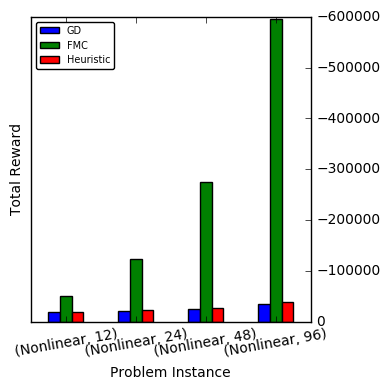

In [6]:
dfs = data_final_df.groupby(['Domain_Type'])
counter=0
leg=list(range(3))
for name,group in dfs:
    plot = group[['Domain_Type','Horizon','GD','FMC','Heuristic']].plot(kind='bar', color=['blue','green','red'],x=['Domain_Type','Horizon'], legend=False)
    fig = plot.get_figure()
    ax = fig.add_subplot(111)
    ax.yaxis.tick_right()
    fig.set_size_inches(4, 4)
    plt.xticks(rotation=10)
    #plt.yticks(rotation=15)
    plt.ylabel('Total Reward')
    #plt.xlabel('Domain,Size,Horizon')
    plt.gca().invert_yaxis()
    plt.xlabel('Problem Instance')
    plt.tight_layout()
    if counter ==0:
        plt.legend(fancybox=True,loc='upper left', prop={'size':7})
    #leg[counter].get_frame().set_alpha(0.5)
    counter=counter+1
    plt.savefig('../PLOTS/HVAC_'+name+'_BAR.eps',format='eps')